# 14. Warehouse Woes

Today, we need to simulate how robot would move boxes in a warehouse. I sont think there is any other way to solve this than using itweration.

However. for box moving, a recursie function that goes over all boxes in direction should do the work

#######
#@..#.#
#.O...#
#..O..#
#..O..#
#.....#
#######
Part 1: 908


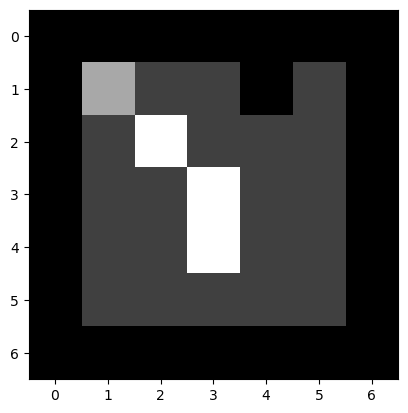

In [2]:
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

def PrintWH(wh):
    for line in wh:
        print("".join(line))

def direction(i):
    match i:
        case "^": return np.array([-1, 0])
        case "v": return np.array([1, 0])
        case "<": return np.array([0, -1])
        case ">": return np.array([0, 1])
        case _: raise ValueError("Invalid direction character!")

def Move(Coord, direct):
    nx, ny = Coord + direct
    x, y = Coord
    
    if not (0 <= nx < len(wh) and 0 <= ny < len(wh[0])):
        return False # Move not possible
    
    nextItem = wh[nx][ny]
    # if next item is dot, move is possible, so move current item and return true
    # if next item is box, recursivelly call itself
    # if next item is wall, move is not possible and return false
    match nextItem:
        case "#":
            return False
        case ".":
            wh[nx][ny] = wh[x][y]     
            wh[x][y] = "."
        case "O":
            if Move(np.array([nx, ny]), direct):
                wh[nx][ny] = wh[x][y]     
                wh[x][y] = "."
            else: return False
            
    return True

warehouse, moves = open("test.txt", "r").read().split("\n\n")

wh = [[char for char in line] for line in warehouse.split("\n")]
moves = moves.replace("\n", "")

robotPos = np.array([(ix, iy) for ix, row in enumerate(wh) for iy, i in enumerate(row) if i == '@'][0])

for drct in moves:
    # print()
    # print(drct)
    if Move(robotPos, direction(drct)):
        robotPos += direction(drct)
        



numericWH = [[ord(char) for char in line] for line in wh]
plt.imshow(numericWH, cmap = "gray")
PrintWH(wh)

GPS = [[x + y * 100 for x, item in enumerate(line) if item == "O"] for y, line in enumerate(wh)]
print("Part 1:", np.sum(np.concatenate(GPS), dtype = int))

In [12]:

def Move(Coord, direct, visited = set()):
    nx, ny = Coord + direct
    x, y = Coord
    
    visited.add(tuple(Coord))
    
    if tuple(Coord + direct) in visited:
        return False
    
    if not (0 <= nx < len(wh) and 0 <= ny < len(wh[0])):
        return False # Move not possible
    
    nextItem = wh[nx][ny]
    # if next item is dot, move is possible, so move current item and return true
    # if next item is box, recursivelly call itself
    # if next item is wall, move is not possible and return false
        
    match nextItem:
        case "#":
            return False
        case ".":
            wh[nx][ny] = wh[x][y]     
            wh[x][y] = "."    
        case "[":
            if tuple(Coord + np.array([0, 1])) not in visited:
                if Move(np.array([x, y]) + np.array([0, 1]), direct, visited) and Move(np.array([nx, ny]), direct, visited):
                    wh[nx][ny] = wh[x][y]     
                    wh[x][y] = "."
        
            else: return False
        case "]":
            if tuple(Coord - np.array([0, 1])) not in visited:     
                if Move(np.array([x, y]) + np.array([0, -1]), direct, visited) and Move(np.array([nx, ny]), direct, visited):
                    wh[nx][ny] = wh[x][y]     
                    wh[x][y] = "."
            
            else: return False
            
        
            
    return True

warehouse, moves = open("test.txt", "r").read().split("\n\n")

wh = [np.concatenate([[".","."] if char == "." else ["#","#"] if char == "#" else ["[","]"] if char == "O" else ["@","."] if char == "@" else char for char in line]) for line in warehouse.split("\n")]  
moves = moves.replace("\n", "")

robotPos = np.array([(ix, iy) for ix, row in enumerate(wh) for iy, i in enumerate(row) if i == '@'][0])

print(robotPos)

PrintWH(wh)
for drct in moves:
    print()
    print(drct)
    if Move(robotPos, direction(drct), set()):
        robotPos += direction(drct)
    PrintWH(wh)
        



# numericWH = [[ord(char) for char in line] for line in wh]
# plt.imshow(numericWH, cmap = "gray")
# PrintWH(wh)

# GPS = [[x + y * 100 for x, item in enumerate(line) if item == "O"] for y, line in enumerate(wh)]
# print("Part 2:", np.sum(np.concatenate(GPS), dtype = int))

[ 3 10]
##############
##......##..##
##..........##
##....[][]@.##
##....[]....##
##..........##
##############

<
##############
##......##..##
##..........##
##....[][]@.##
##....[]....##
##..........##
##############

v
##############
##......##..##
##..........##
##....[][.@.##
##....[].]..##
##..........##
##############

v
##############
##......##..##
##..........##
##....[][.@.##
##....[]....##
##.......]..##
##############

<
##############
##......##..##
##..........##
##....[][.@.##
##....[]....##
##......]...##
##############

<
##############
##......##..##
##..........##
##....[][.@.##
##....[]....##
##.....]....##
##############

^
##############
##......##..##
##..........##
##....[][.@.##
##....[]....##
##.....]....##
##############

^
##############
##......##..##
##..........##
##....[][.@.##
##....[]....##
##.....]....##
##############

<
##############
##......##..##
##..........##
##....[][.@.##
##....[]....##
##.....]....##
##############

<
##############
##...